In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy as scipy
from sklearn.cluster.k_means_ import KMeans

In [ ]:
df = pd.read_csv('sample_data/points1.csv')

In [ ]:
df

,Name,x,y
0,A,2,10
1,B,2,5
2,C,8,4
3,D,5,8
4,E,7,5
5,F,6,4
6,G,1,2
7,H,4,9


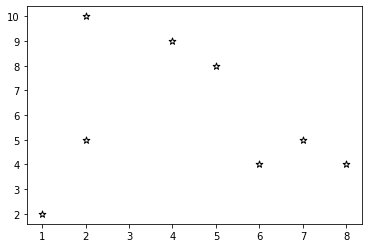

In [ ]:
# plot
plt.scatter(
   df[['x']], df[['y']],
   c='white', marker='*',
   edgecolor='black', s=50
)
plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=400, 
    tol=1e-04, random_state=0
)
kmeans = km.fit_predict(df[['x', 'y']])


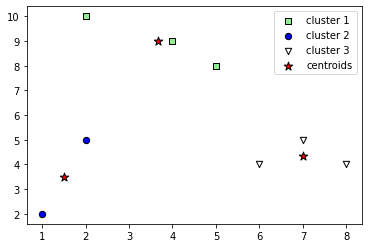

In [ ]:
dff = df[['x', 'y']]

# clusters
c_1 = dff[kmeans==0]
c_2 = dff[kmeans==1]
c_3 = dff[kmeans==2]

plt.scatter(
    c_1[['x']], c_1[['y']],
    s=40, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    c_2[['x']], c_2[['y']],
    s=40, c='blue',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    c_3[['x']], c_3[['y']],
    s=40, c='white',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=80, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.show()

100.75
54.5
14.333333333333332
8.666666666666666
3.666666666666667
2.0
1.0


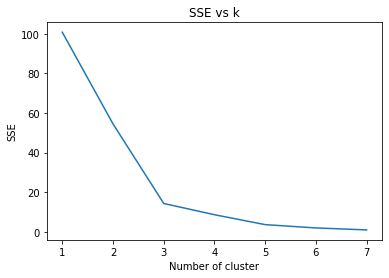

In [ ]:
sse = {}
for k in range(1, df.shape[0]):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(df[['x', 'y']])
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    print(sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('SSE vs k')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()